# Predict popular recipes
* Demands
    - Predict which recipes will lead to high traffic
    - Correctly predict high traffic recipes 80% of the time?

In [1]:
# import data handling and visualization libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

In [2]:
# Load Data
load_dotenv()
data_path = os.getenv('data_path')
recipes = pd.read_csv(data_path)

# Data Validation

In [3]:
# Inspect the data

# Check Head
display(recipes.head())

# Check Data Integrity

display(recipes.info(), recipes.isna().sum(), recipes.category.value_counts(dropna=False), recipes.high_traffic.value_counts(dropna=False))

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


None

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

high_traffic
High    574
NaN     373
Name: count, dtype: int64

# Observations
*     All recipes are numbered
*     The columns [calories, carbohydrate, sugar and protein] are missing the same amount of entries
*     the column high_traffic is missing many values, and apper to be only two types [High, NaN], The NaN values seems to refer to not high traffic recipes (Fill NaN with 'Low')
*     The 'category' column contains a finite number of observations and is a good candidate to One-Hot encoding when predicting popularity

# Data Treatment

In [4]:
# Replacine 'high_traffic' NaN woth 'Low'
recipes.high_traffic.fillna('Low', inplace=True)

In [5]:
# Check if the missing values on the calories, carbohydrate, sugar and protein columns are in the same rows
na_rows = recipes[recipes[['calories','carbohydrate','sugar','protein']].isna().all(axis=1)]
display(na_rows.head(),na_rows.shape)

# Check the percentage of missing values in all specified rows
perc = (na_rows.shape[0]/recipes.shape[0]) * 100
print(f'Percentage of missing full rows {perc:.2f}%')

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High


(52, 8)

Percentage of missing full rows 5.49%


* Since the percentage of missing values is around 5%, it isnt a problem to just remove them, seeing that there are not enough info to find a method to impute the values

In [6]:
# Check again the total missing values
print(recipes.isna().sum())

# drop missing values
recipes.dropna(inplace=True)

# Check
print(recipes.isna().sum())

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64
recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


# Data Exploration and Visualization

In [7]:
# set plot style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

### Visualization for single variables

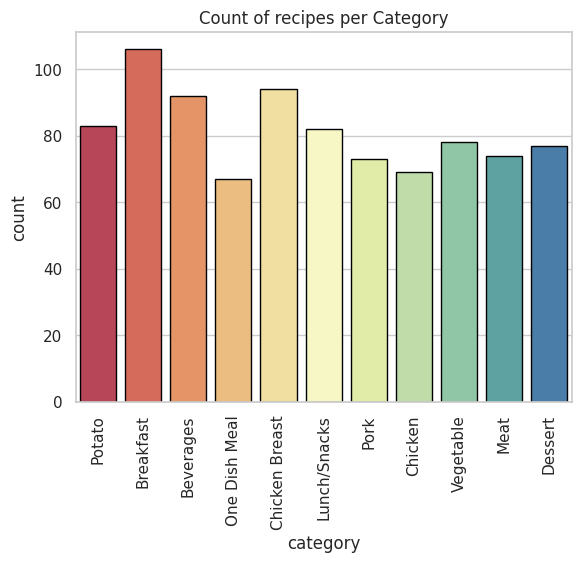

In [14]:
# Plot the amount of recipes per categories
sns.countplot(data=recipes, x='category', edgecolor='black',palette='Spectral')
plt.title('Count of recipes per Category')
plt.xticks(rotation=90)
plt.show()

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


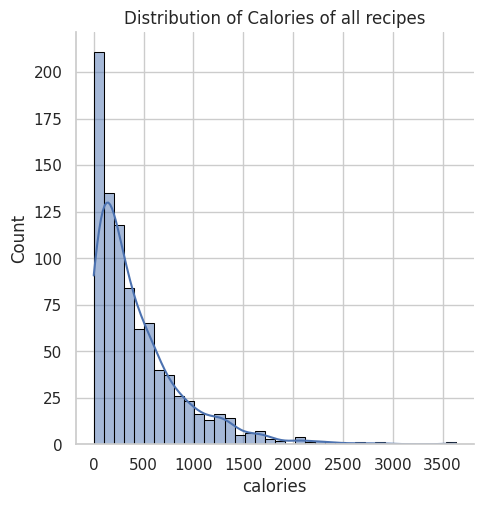

In [22]:
# Plot the distribution of calories
sns.displot(data=recipes, x='calories', kde=True, edgecolor='black')
plt.title('Distribution of Calories of all recipes')
plt.show()

### Visualisation for multiple variables

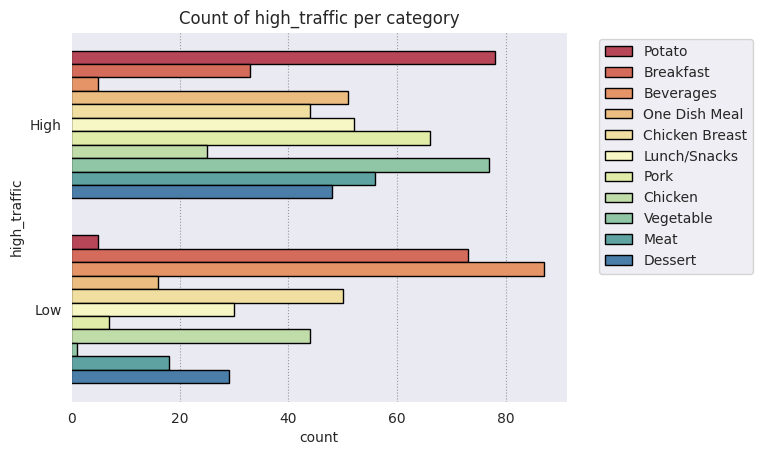

<Figure size 1200x1000 with 0 Axes>

In [10]:
# Plot the most popular category for high_traffic recipes
sns.countplot(data=recipes, y='high_traffic', hue='category', palette='Spectral', edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Count of high_traffic per category')
plt.figure(figsize=(12, 10))
plt.show()

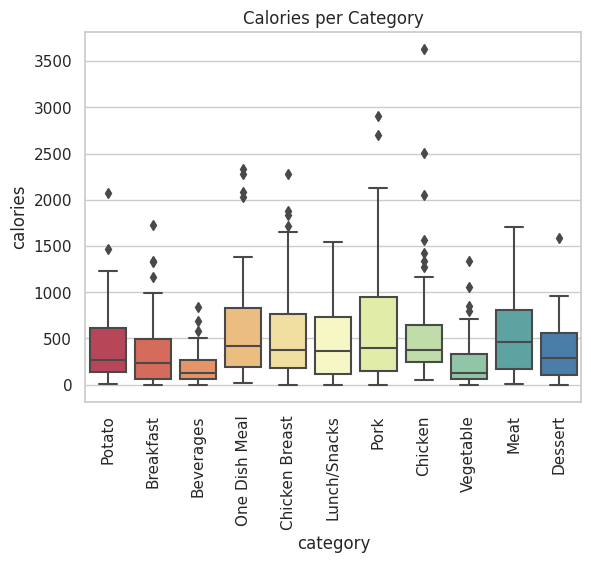

In [30]:
# Plot the calories per meal category
sns.boxplot(data=recipes, x='category', y='calories', palette='Spectral').set(title='Calories per Category')
plt.xticks(rotation=90)
plt.show()

### Observations from the visualizations
-   The three recipes with most entries are Breakfast, Chiken Breast and Beverages
-   Most of the recipes have less than 1000 calories, with the majority being less than 500
-   Potato and Vegetable recipes tend to have the most amount of high traffic, with beverages being the less popular category
-   The recipes with the highest mean calories are meat recipes, with chicken recipes having an recipe with a very high amount of calories
    -   Beverages and Vegetables tend to have lower calories, with Beverages having a lower mean

* The outliers in the data don't seem to be erroneous data

### Exploratory analysis of the data and summary statistics